## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [61]:
import pandas as pd
import numpy as np

file_name = "/home/sgorla/data/data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [75]:
x = data['BX_COUNTER'].max()
print("x =", x)

x = 3563


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [91]:
orbit = data['ORBIT_CNT'].iloc[-1] - data['ORBIT_CNT'][0]
bx = data['BX_COUNTER'].iloc[-1] - data['BX_COUNTER'][0]
tdc = data['TDC_MEAS'].iloc[-1] - data['TDC_MEAS'][0]

timens = orbit*x*25 + bx*25 + tdc*(25/30)
print("data taking time:", "{:.4}".format(timens*1e-9), "s")

data taking time: 0.9801 s


In [92]:
time = data.iloc[-1,-3:] - data.iloc[0,-3:]
timens = time[0]*x*25 + time[1]*25 + time[2]*(25/30)
print("data taking time:", "{:.4}".format(timens*1e-9), "s")

data taking time: 0.9801 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [96]:
data['timens'] = (data['ORBIT_CNT']-data['ORBIT_CNT'][0])*x*25 + data['BX_COUNTER']*25 + data['TDC_MEAS']*25/30
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,1,1,4,3869211171,763,11,9.802004e+08
1310717,1,0,64,3869211171,764,0,9.802004e+08
1310718,1,0,139,3869211171,769,0,9.802005e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [99]:
data.loc[:,'HEAD'] = np.random.randint(2, size=len(data))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,5.937167e+04
1,0,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,0,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,1,1,4,3869211171,763,11,9.802004e+08
1310717,0,0,64,3869211171,764,0,9.802004e+08
1310718,1,0,139,3869211171,769,0,9.802005e+08


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [102]:
data2 = data[data['HEAD'] == 1]
data2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,5.937167e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
5,1,0,63,3869200167,2762,4,6.905333e+04
7,1,0,139,3869200167,2776,0,6.940000e+04
...,...,...,...,...,...,...,...
1310711,1,1,39,3869211171,430,0,9.801920e+08
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,1,1,4,3869211171,763,11,9.802004e+08
1310718,1,0,139,3869211171,769,0,9.802005e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

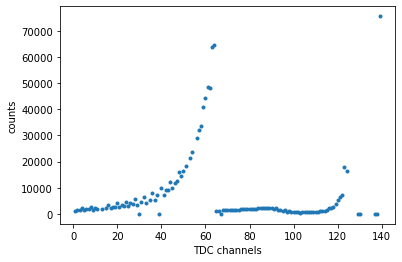

139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64

In [175]:
import matplotlib.pyplot as plt

#data[data['FPGA'] == 0]['TDC_CHANNEL'].plot.hist(bins=139)

s0 = data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts()

plt.plot(s0, '.')
plt.xlabel('TDC channels')
plt.ylabel('counts')
plt.show()

s0

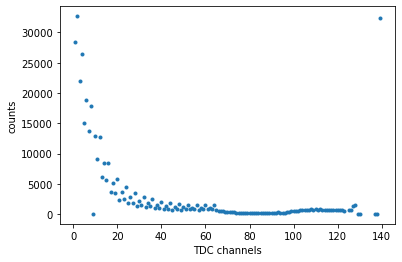

2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64

In [195]:
#data[data['FPGA'] == 1]['TDC_CHANNEL'].plot.hist(bins=50)

s1 = data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts()

plt.plot(s1, '.')
plt.xlabel('TDC channels')
plt.ylabel('counts')
plt.show()

s1

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [190]:
s = data.groupby('FPGA')['TDC_CHANNEL'].apply(lambda x: x.value_counts())
s

FPGA     
0     139    75617
      64     64581
      63     63724
      61     48699
      62     48275
             ...  
1     9         80
      130       38
      138       36
      137       36
      129       35
Name: TDC_CHANNEL, Length: 256, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139